# 카드사 해보기

# 라이브러리 불러오기

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#전처리 인코딩 및 스케일링
from sklearn.preprocessing import StandardScaler , LabelEncoder #스케일링, 인코딩 

#샘플 불균형 맞추기
from imblearn.over_sampling import SMOTE # 데이터 많은 곳에 맞추기
from sklearn.ensemble import RandomForestClassifier # 클래스 가중치 조정 

# 데이터 분리
from sklearn.model_selection import train_test_split

# 모델
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#최적의 모델 찾기
from sklearn.model_selection import GridSearchCV

#성능평가
from sklearn.metrics import accuracy_score

# 검증 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

def get_clf_eval(Y_test, pred):
    confusion = confusion_matrix(Y_test, pred)
    accuracy = accuracy_score(Y_test, pred) # 전체 샘플 중에서 예측을 맞춘 비율
    precision = precision_score(Y_test, pred) # 모델이 1이라고 예측한 것들 중 실제로 1인 비율
    recall = recall_score(Y_test, pred) #실제로 1인 것들 중에 모델이 1이라고 맞춘 비율

    print(confusion)
    print(f'정확도={accuracy}')
    print(f'정밀도={precision}')
    print(f'재현율={recall}')
    print(accuracy, precision, recall)
    
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test, pred, pred_proba)


import os

import warnings
warnings.filterwarnings(action='ignore')

# 파일불러오기

In [4]:
cd = pd.read_csv('data1/creditcard.csv', encoding='euc-kr')

# 데이터 둘러보기

<details>
<summary> 데이터 설명 </summary>

| 컬럼명           | 설명                                                    |
| ------------- | ----------------------------------------------------- |
| **Time**      | 첫 거래로부터 경과된 시간(초 단위). 시간 흐름 분석 가능                     |
| **V1 \~ V28** | PCA(주성분 분석)로 변환된 주요 거래 특성들<br>※ 원래의 의미 있는 변수는 보안상 비공개 |
| **Amount**    | 해당 거래의 금액 (유로 단위)                                     |
| **Class**     | 타겟 값 (0: 정상 거래, 1: 사기 거래)                             |

결측치 없음
수치형 데이터
데이터 불균형 확인

</details>

In [7]:
cd.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [11]:
cd['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [14]:
X = cd.drop('Class', axis=1)
y = cd['Class']

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# 데이터 분할 및 스케일링

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                                test_size=0.1,
                                                random_state=42)

Sc = StandardScaler()
Sc.fit(xtrain)
Sc_xtrain = Sc.transform(xtrain)
Sc_xtest = Sc.transform(xtest)

In [ ]:
lomodel = LogisticRegression()
lomodel.fit(Sc_xtrain, ytrain)
lo_pred = lomodel.predict(Sc_xtest)
lo_acc = accuracy_score(ytest, lo_pred)
print(f'acc = {lo_acc}')

de_model = DecisionTreeClassifier()
de_model.fit(Sc_xtrain, ytrain)
de_pred = de_modlo_predel.predict(Sc_xtest)
de_acc = accuracy_score(ytest, de_pred)
print(f'acc = {de_acc}')


rd_model = RandomForestClassifier(random_state=20, max_depth=8)
rd_model.fit(Sc_xtrain, ytrain)
rd_pred = rd_model.predict(Sc_xtest)
rd_acc = accuracy_score(ytest,rd_pred)
print(f'acc = {rd_acc}')


acc = 0.9991573329588147
acc = 0.9990871107053826
acc = 0.9995786664794073


In [40]:
li = {
    '로지스틱' : lo_pred,
    '결정나무' :de_pred,
    '무작위숲' :rd_pred}

for i, n in li.items():
    print(i)
    get_clf_eval(ytest, n)
    print()

로지스틱
[[28429     6]
 [   18    28]]
정확도=0.9991573329588147
정밀도=0.8235294117647058
재현율=0.6086956521739131
0.9991573329588147 0.8235294117647058 0.6086956521739131

결정나무
[[28422    13]
 [   13    33]]
정확도=0.9990871107053826
정밀도=0.717391304347826
재현율=0.717391304347826
0.9990871107053826 0.717391304347826 0.717391304347826

무작위숲
[[28434     1]
 [   11    35]]
정확도=0.9995786664794073
정밀도=0.9722222222222222
재현율=0.7608695652173914
0.9995786664794073 0.9722222222222222 0.7608695652173914



In [64]:
from lightgbm import LGBMClassifier
lg_model = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
get_model_train_eval(lg_model, ftr_train=xtrain, ftr_test=xtest,
                     tgt_train=ytrain, tgt_test=ytest)

오차 행렬
[[28434     1]
 [   10    36]]
정확도: 0.9996, 정밀도: 0.9730, 재현율: 0.7826,    F1: 0.8675, AUC:0.9909


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [61]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [52]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(xtrain, ytrain)
lr_pred = lr_clf.predict(xtest)
lr_pred_proba = lr_clf.predict_proba(xtest)[:,1]
get_clf_eval(ytest, lr_pred, lr_pred_proba)

오차 행렬
[[28422    13]
 [   26    20]]
정확도: 0.9986, 정밀도: 0.6061, 재현율: 0.4348,    F1: 0.5063, AUC:0.8542


In [54]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=xtrain, ftr_test=xtest, 
                     tgt_train=ytrain, tgt_test=ytest)

오차 행렬
[[28434     1]
 [   10    36]]
정확도: 0.9996, 정밀도: 0.9730, 재현율: 0.7826,    F1: 0.8675, AUC:0.9909


In [ ]:
# 정보가 비대칭적이기 때문에 정확도는 높아도 실제로 잡는 확률이 별로 안됨 b

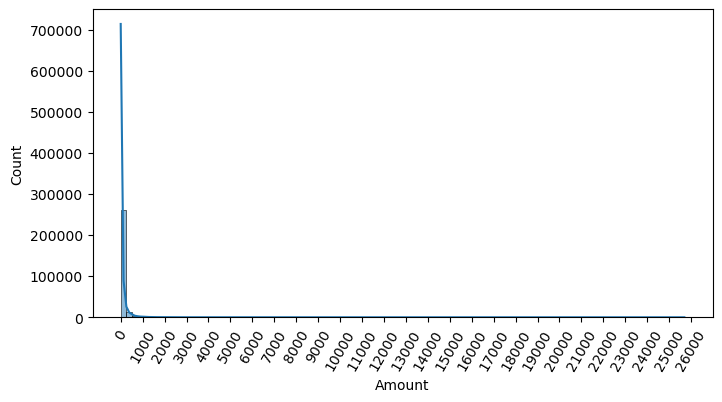

In [56]:
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0,30000, 1000), rotation=60)
sns.histplot(cd['Amount'], bins=100, kde=True)
plt.show()

In [57]:
from sklearn.preprocessing import StandardScaler
def get_preprocessed_cd(cd=None):
    cd_copy = cd.copy()
    cd_copy.drop('Time', axis=1, inplace=True)
    
    #Amount scaling
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(cd_copy['Amount'].values.reshape(-1,1))
    cd_copy.insert(0, 'Amount_scaled', amount_n)

In [34]:
ytrain.value_counts()/ytrain.shape[0]*100

Class
0    99.826003
1     0.173997
Name: count, dtype: float64

<Axes: >

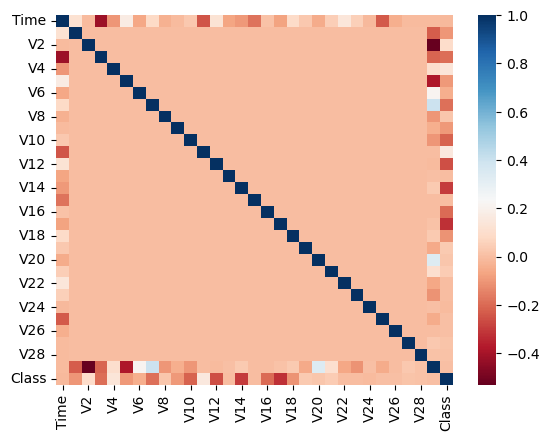

In [65]:
# 이상치 탐색
corr=cd.corr()
sns.heatmap(corr, cmap='RdBu')

In [66]:
def get_outlier(df=None, column=None, weight=1.5):

    fraud = df[df['Class']==1][column]

    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight #lower
    highest_val = quantile_75 + iqr_weight #upper
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [ ]:
outlier_index = get_outlier(df = cd, column='V14', weight=)



KeyError: None

In [ ]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    
    #Amount scaling
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    df_copy.insert(0, 'Amount_scaled', amount_n)